In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
#from google.colab import files
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing import image
#from PIL import Image

#%matplotlib inline

In [ ]:
# Загрузка обучающей и тестовой выборок
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
# Смотрим размерность обучающего и тестового наборов
print(f'X_train: {X_train.shape} \n y_train: {y_train.shape}\
       \n X_test: {X_test.shape} \n y_test: {y_test.shape}')

X_train: (60000, 28, 28) 
 y_train: (60000,)       
 X_test: (10000, 28, 28) 
 y_test: (10000,)


In [ ]:
# Нормализация входных данных. Приводим к числам от 0 до 1
X_train = (X_train / 255).astype('float32')
X_test =  (X_test / 255).astype('float32')

In [ ]:
# Преобразование выходных значений в векторы по категориям (Hot Encoding)
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

In [ ]:
# Добавляем новую оссь к массиву
X_train = np.expand_dims(X_train, axis=3)
X_test = np.expand_dims(X_test, axis=3)

In [ ]:
# Конвертируем обучающий набор
X_train = X_train.reshape(X_train.shape[0], 28, 28)

In [ ]:
# Размер y_train_cat
y_train_cat.shape

(60000, 10)

In [ ]:
# Пример одного выходного вектора
y_train_cat[5]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

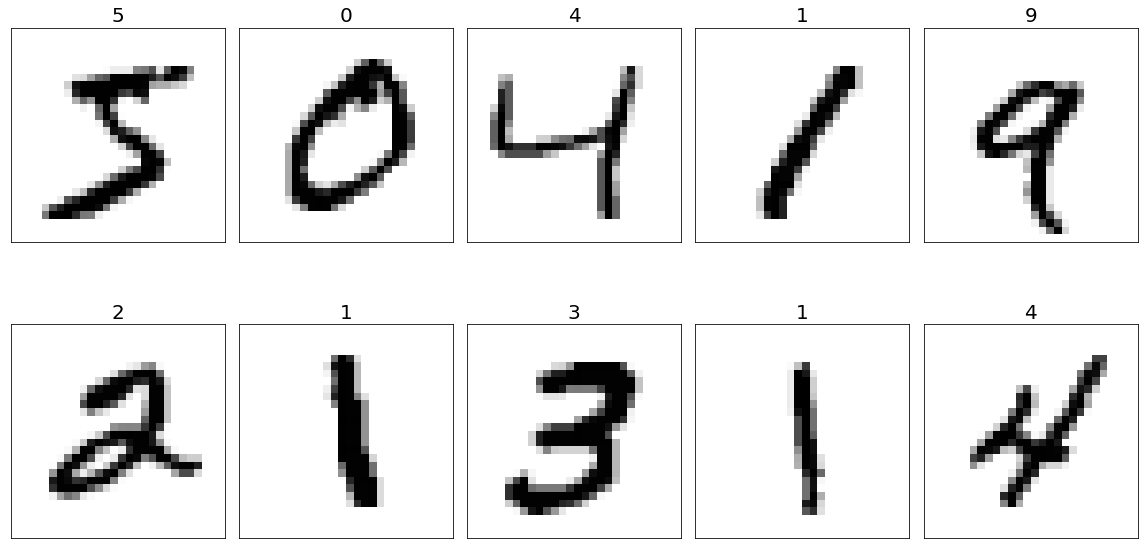

In [ ]:
# выведем случайно выбранный набор из 24 изображений обучающего набора MNIST
index = np.random.choice(np.arange(len(X_train)), 10, replace=False)
figure, axes = plt.subplots(nrows=2, ncols=5, figsize=(16, 9))
for item in zip(axes.ravel(), X_train, y_train):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(target,fontsize=20)
plt.tight_layout()
plt.show()

In [ ]:
# Формирование модели NN
model = keras.Sequential([
    Flatten(input_shape=(28, 28, 1)),  # входной слой
    Dense(256, activation='relu'),     # первый срытый слой  
    Dense(128, activation='relu'),     # второйый срытый слой 
    Dense(64, activation='relu'),      # третий срытый слой 
    Dense(10, activation='softmax')    # выходной слой 
])

In [ ]:
# Компиляция NN
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Обучаем
hist_mod = model.fit(X_train, y_train_cat, batch_size=64, epochs=15, verbose=1)

Epoch 1/15
938/938 [==============================] - 4s 3ms/step - loss: 0.4413 - accuracy: 0.8692
Epoch 2/15
938/938 [==============================] - 3s 3ms/step - loss: 0.0945 - accuracy: 0.9714
Epoch 3/15
938/938 [==============================] - 3s 3ms/step - loss: 0.0581 - accuracy: 0.9817
Epoch 4/15
938/938 [==============================] - 3s 3ms/step - loss: 0.0456 - accuracy: 0.9851
Epoch 5/15
938/938 [==============================] - 3s 3ms/step - loss: 0.0334 - accuracy: 0.9889
Epoch 6/15
938/938 [==============================] - 3s 3ms/step - loss: 0.0301 - accuracy: 0.9903
Epoch 7/15
938/938 [==============================] - 3s 3ms/step - loss: 0.0225 - accuracy: 0.9927
Epoch 8/15
938/938 [==============================] - 3s 3ms/step - loss: 0.0203 - accuracy: 0.9932
Epoch 9/15
938/938 [==============================] - 3s 3ms/step - loss: 0.0186 - accuracy: 0.9941
Epoch 10/15
938/938 [==============================] - 3s 3ms/step - loss: 0.0167 - accuracy: 0.9946

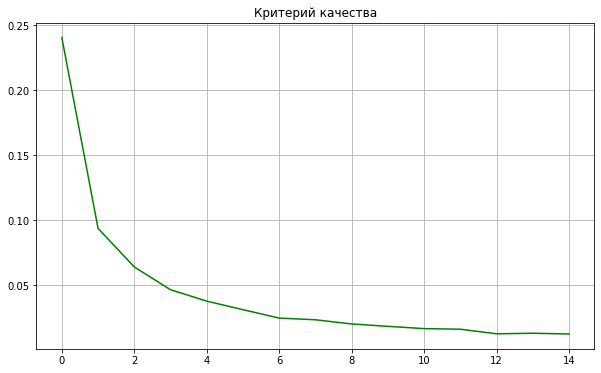

In [ ]:
# график показатель критерий качестваа для каждой эпохи
plt.figure(figsize=(10, 6))
plt.plot(hist_mod.history['loss'], color='green')
plt.title('Критерий качества')
plt.grid()
plt.show()

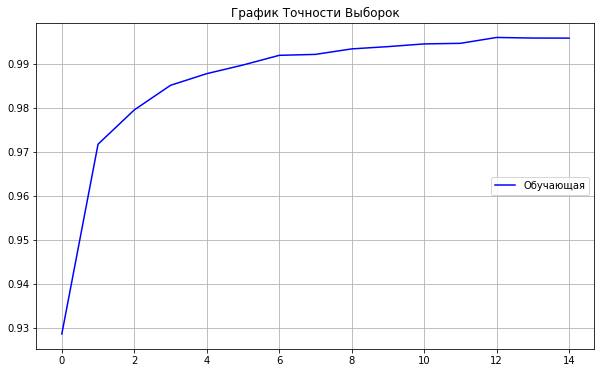

In [ ]:
# график показатель точности на обучающей выборке
plt.figure(figsize=(10, 6))
ax = plt.subplot(1, 1, 1)
ax.plot(hist_mod.history['accuracy'], color='blue', label='Обучающая')
ax.set_title('График Точности Выборок')
ax.legend(loc='center right')
plt.grid()
plt.show()

In [ ]:
# точность модели можно проверить на данных, неизвестных модели. Вызовем метод evaluate моделиloss, 
accuracy = model.evaluate(X_test, y_test_cat)

313/313 [==============================] - 1s 1ms/step - loss: 0.1039 - accuracy: 0.9804


In [ ]:
# Проверка распознавания цифр. Подаем первое изображение.
n = 805
X = np.expand_dims(X_test[n], axis=0)   # создаем трехмерный тенсор
res = model.predict(X)
print(res)
print(f'Распознанная цифра: {np.argmax(res)}')

[[6.1794347e-10 7.0017728e-11 7.6674944e-10 2.4987875e-08 8.3177250e-12
  1.2487993e-09 2.5630502e-12 5.7564123e-12 1.0000000e+00 1.8743516e-09]]
Распознанная цифра: 8


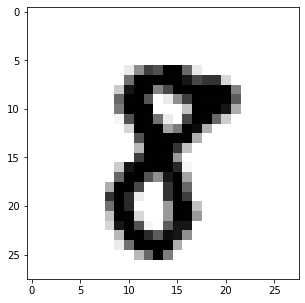

In [ ]:
# Вывод изображения
X_test = X_test.reshape(X_test.shape[0], 28, 28)
plt.figure(figsize=(5, 5))
plt.imshow(X_test[n], cmap=plt.cm.binary)
plt.show()

In [ ]:
# загружаем свою картинку
img = image.load_img('/content/drive/MyDrive/UAI/Data_CSV/photo_num_4.jpg', target_size=(28, 28), color_mode='grayscale')

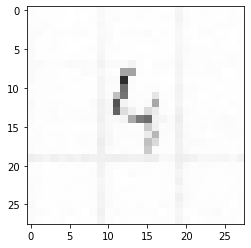

In [ ]:
plt.imshow(img.convert('RGBA'))
plt.show()

In [ ]:
# Преобразуем img в массив
num = image.img_to_array(img)
# Преобразуем в вектор
num = num.reshape(1, 28, 28)
# инвертируем
num = 255 - num
# Нормализуем
num /= 255

In [ ]:
# Предсказываем и выводим результат
pred = model.predict(num)
print(np.argmax(pred))

4


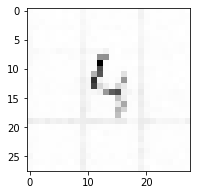

In [ ]:
# Выводим предсказанное изображение
num = num.reshape(28, 28)
plt.figure(figsize=(3, 3))
plt.imshow(num, cmap=plt.cm.binary)
plt.show()

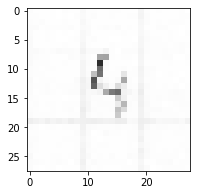

In [ ]:
# Сверяем с изображением с картинки
plt.figure(figsize=(3, 3))
plt.imshow(img.convert('RGBA'))
plt.show()